## Distribuciones en forma de anillo

In [4]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def ring(r_min=0, r_max=1, n_sample=360):
    angle = rnd.uniform(0,2*pi,n_sample)
    distance  = rnd.uniform(r_min, r_max, n_sample)
    data = []
    for a,d in zip(angle, distance):
        data.append([d*cos(a),d*sin(a)])
    return np.array(data)

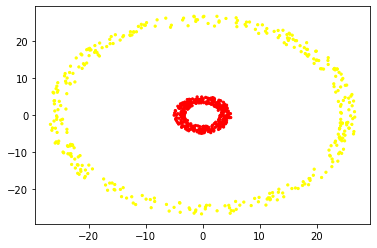

In [6]:
data1 = ring(3,5,)
data2 = ring(24,27)

data = np.concatenate([data1,data2], axis=0)
labels = np.concatenate([[0for i in range(0, len(data1))], [1 for i in range(0, len(data2))]])
plt.scatter(data[:,0],data[:,1],c = labels, s=5, cmap = "autumn")


## Algoritmo con K-means

**Veremos si kmeans nos ayuda a generar los clusters que se muestran arriba, considerando esta vez que son anillos, más que circulos**

In [7]:
from sklearn.cluster import KMeans

In [8]:
km = KMeans(2).fit(data)

In [9]:
clust = km.predict(data)

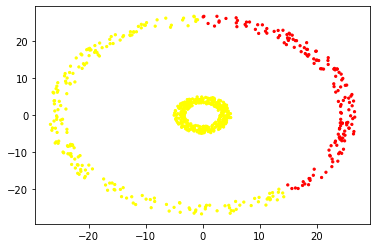

In [10]:
plt.scatter(data[:,0],data[:,1], c = clust, s=5, cmap= "autumn")

**El algoritmo no es capaz de resolver el problema para 2 anillos concentricos, como vemos en el gráfico de arriba. Esto se produce debido a que como son anillos concentricos, la distancia de los putnos al centro es la misma, por lo que se confunde el algoritmo y no logra definir bien la pertenencia de los pts. Deberemos utilizar otra forma de clasificar, los K-medoides**

## K- Medoides

**Seleccionar k puntos iniciales dentro del conjunto inicial de clusters, para cada uno de los puntos del dataset se calculará el centro del cluster más cercano con cualquier tipo de metrica y la diferencia está en que, en el centro del cluster no quedará asignado al baricentro de esos puntos, sino que quedara asignado a dicho punto en cuestion, para cada punto del cluster lo que se hara es intercambiar el centro del cluster con el punto y calcular asi la reduccion en las distancias totales con respecto al centro del cluster, a través de todos los miembros utilizando cswap, sino mejora basicamente no los escogeremos. Iteraremos por todos los pts del dataset y nos quedaremos siempre como centro uno de los pts. De ahi viene el nombre de los k-medoides, ya que intenta buscar el punto que esté más enmedio**

In [14]:
from pyclust import KMedoids

In [18]:
kmed = KMedoids(2).fit_predict(data)

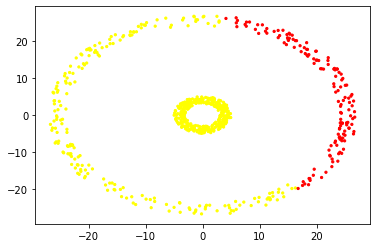

In [19]:
plt.scatter(data[:,0],data[:,1],c=kmed, s=5, cmap="autumn")

**Vemos que tampoco sirve, por lo que utilizaremos las transformaciones lineales, es decir otro metodo, buscaremos los valores propios de los elementos**

## Algoritmo del CLustering Espectral

**Vale la pena ver como funciona en profundidad este clustering espectral**

In [22]:
from sklearn.cluster import SpectralClustering 

In [24]:
clust_espec = SpectralClustering(2).fit_predict(data)

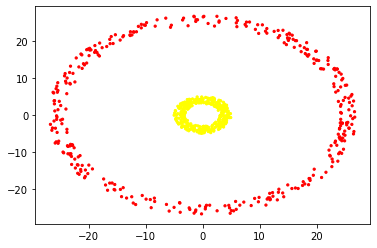

In [25]:
plt.scatter(data[:,0],data[:,1],c=clust_espec, s=5, cmap="autumn")

**Vemos claramente que ahora si podemos realizar la clasificación necesaria**

**Este algoritmo lo usaremos en ultima instancia, los pasos son:**
* Podemos estimar  K para utilizar K-means.
    * Si: Podemos usar la distancia Euclídea
    * NO: Prueba de la afinidad
        * Sí: Kmedoides
        * NO: los datos son linealmente separables?:
            * SI: clustering aglomerativo
            * NO: Clustering Espectral